# Linear Regression in 1D - Prediction

## Simple linear regression - prediction


In [1]:
import torch
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)
def forward(x):
    y=w*x+b
    return y

In [3]:
x=torch.tensor([1.0])
yhat=forward(x)
yhat

tensor([1.], grad_fn=<AddBackward0>)

In [4]:
x=torch.tensor([[1.0],[2.0]])
forward(x)             

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)

## PyTorch - Class Linear

In [5]:
from torch.nn import Linear
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [7]:
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([-0.4414], grad_fn=<AddBackward0>)

In [8]:
x=torch.tensor([[1.0],[2.0]])
model(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

## PyTorch - Custom Modules

In [9]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
model = LR(1, 1)
list(model.parameters())

[Parameter containing:
 tensor([[-0.9414]], requires_grad=True),
 Parameter containing:
 tensor([0.5997], requires_grad=True)]

In [14]:
x = torch.tensor([1.0])
yhat = model(x)
yhat

tensor([-0.3417], grad_fn=<AddBackward0>)

In [15]:
x=torch.tensor([[1.0],[2.0]])
model(x)

tensor([[-0.3417],
        [-1.2832]], grad_fn=<AddmmBackward>)

In [16]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.9414]])),
             ('linear.bias', tensor([0.5997]))])

# Linear Regression Training

# Gradient Descent and cost

# PyTorch Slope

## Linear Regression PyTorch


In [31]:
import torch
w=torch.tensor(-10.0, requires_grad=True)
X=torch.arange(-3,3,0.1).view(-1, 1)
f = -3*X

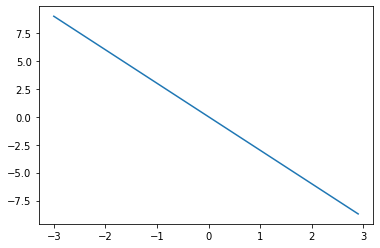

In [33]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show()

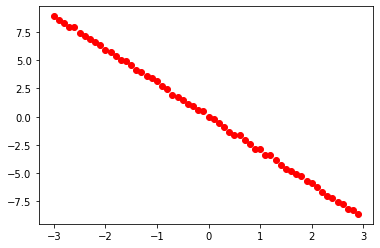

In [34]:
Y = f+0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [35]:
def forward(x):
    return w*x

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)


In [36]:
lr = 0.1
for epoch in range(4):
    Yhat = forward(X)
    loss= criterion(Yhat, Y)
    loss.backward()
    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()

In [37]:
w

tensor(-3.1706, requires_grad=True)

In [39]:
lr = 0.1
COST=[]
for epoch in range(4):
    Yhat = forward(X)
    loss= criterion(Yhat, Y)
    loss.backward()
    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()
    COST.append(loss.item())
COST

[0.00940332468599081,
 0.009350817650556564,
 0.009342440403997898,
 0.009341096505522728]

# Linear Regression Training in PyTorch

## Cost surface

Cost = average loss or total loss

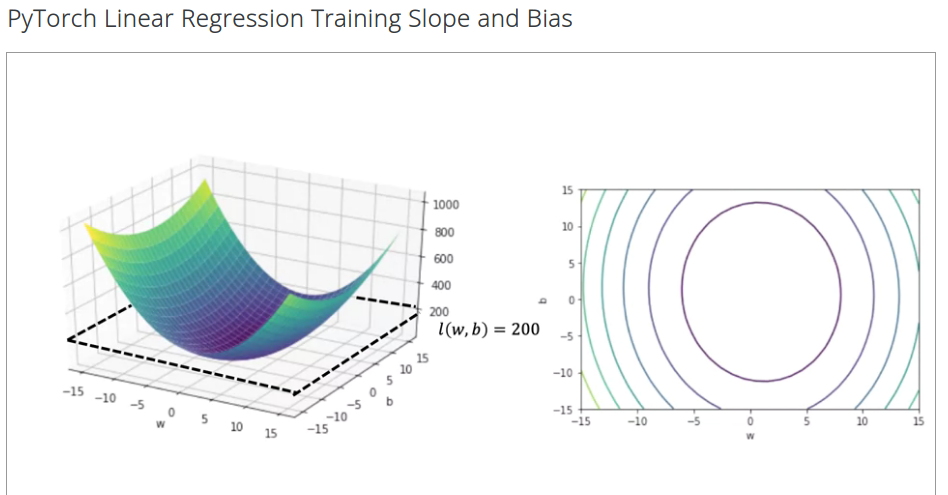

## PyTorch (hard way)

In [40]:
def forward(x):
    y=w*x+b
    return y
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1*X-1
Y = f+0.1*torch.rand(X.size())

In [42]:
lr = 0.1
for epoch in range(15):
    Yhat=forward(X)
    loss=criterion(Yhat, Y)
    loss.backward()
    w.data=w.data-lr*w.grad.data
    w.grad.data.zero_()
    b.data=b.data-lr*b.grad.data
    b.grad.data.zero_()

# Stochastic Gradient Descent and the Data Loader

## Stochastic Gradient Descent in PyTorch

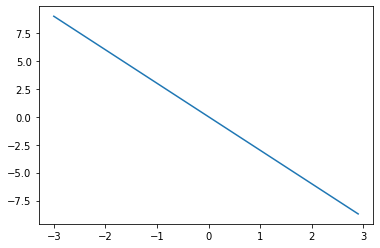

In [44]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show()

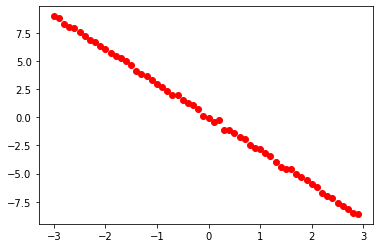

In [45]:
Y=f+0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [46]:
def forward(x):
    y=w*x+b
    return y
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [54]:
lr = 0.1
for epoch in range(4):
    for x, y in zip(X, Y):
        yhat=forward(x)
        loss=criterion(yhat, y)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        w.grad.data.zero_()
        b.data=b.data-lr*b.grad.data
        b.grad.data.zero_()

## Stochastic Gradient Descent DataLoader

In [48]:
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3*X+1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
    
dataset = Data()

In [49]:
len(dataset)

60

In [50]:
#slicing
x,y = dataset[0:3]

In [51]:
x, y

(tensor([[-3.0000],
         [-2.9000],
         [-2.8000]]),
 tensor([[10.0000],
         [ 9.7000],
         [ 9.4000]]))

In [53]:
from torch.utils.data import DataLoader

dataset=Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [55]:
for x, y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    w.data=w.data-lr*w.grad.data
    b.data=b.data-lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

# Mini-Batch Gradient Descent

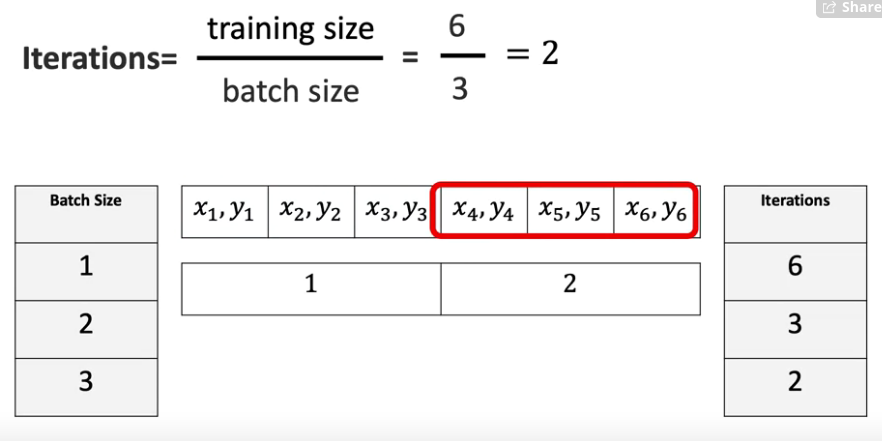

## Mini-Batch Gradient Descent in Pytorch

In [57]:
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=5)

In [59]:
lr=0.1
LOSS = []
for epoch in range(4):
    for x, y in trainloader:
        yhat=forward(x)
        loss = criterion(yhat, y)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()      
        LOSS.append(loss.item())

# Optimization in PyTorch

In [61]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=dataset, batch_size=1)
model = LR(1,1)
from torch import nn, optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [0, 1]}]}

In [62]:
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

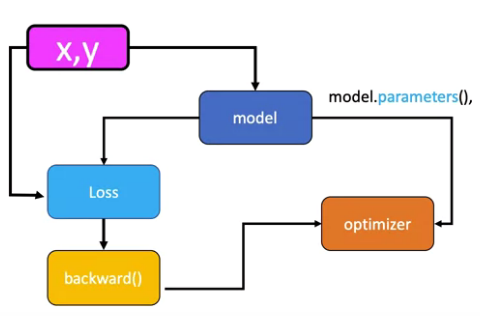

# Training, Validation and Test Split in PyTorch

In [65]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3*self.x+1
        self.y = self.f+0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
                
        
train_data = Data()
val_data = Data(train=False)

In [66]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out=self.linear(x)
        return out

In [67]:
criterion = nn.MSELoss()

trainloader = DataLoader(dataset=train_data, batch_size=1)


In [73]:
epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
validation_error = torch.zeros(len(learning_rates))
test_error=torch.zeros(len(learning_rates))
MODELS=[]


In [76]:
from torch import optim
from tqdm import tqdm
for i, learning_rate in tqdm(enumerate(learning_rates)):
    model = LR(1,1)
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
    
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    yhat=model(train_data.x)
    loss=criterion(yhat, train_data.y)
    test_error[i]=loss.item()

    yhat=model(val_data.x)
    loss=criterion(yhat, val_data.y)
    validation_error[i]=loss.item()
    MODELS.append(model)

5it [00:00,  6.72it/s]


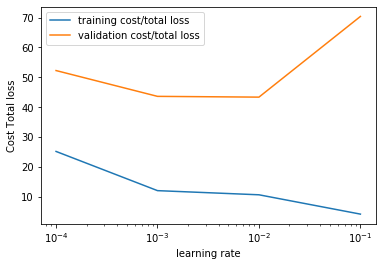

In [78]:
import numpy as np
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label='training cost/total loss')
plt.semilogx(np.array(learning_rates), test_error.numpy(), label='validation cost/total loss')
plt.ylabel('Cost Total loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

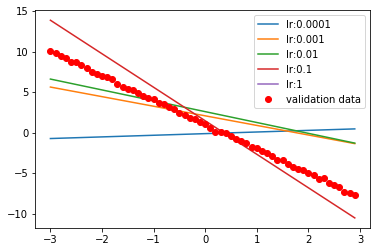

In [80]:
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label='lr:'+str(learning_rate))
plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'or', label='validation data')
plt.legend()
plt.show()